In [1]:
import os
os.sys.path.append('..')

In [2]:
import argparse
import os
import torch
from exp.exp_main import Exp_Main
import random
import numpy as np


In [3]:
Exp = Exp_Main
Exp

exp.exp_main.Exp_Main

In [4]:
import warnings
warnings.simplefilter("ignore")

# autoreload import your package
%load_ext autoreload
%autoreload 2

In [5]:
from loguru import logger
logger.remove()
logger.add(os.sys.stdout, level="ERROR", colorize=True, format="<level>{time} | {message}</level>")
# import_dir(ta_dir, verbose=False)
warnings.simplefilter("ignore")

In [6]:
import torch
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Args

In [7]:
from run import set_seed, get_args, Exp_Main

In [9]:
# mimic cli args to avoid code duplication
argv = """python -u run.py \
  --root_path ../dataset/exchange_rate/ \
  --data_path exchange_rate.csv \
  --model_id Exchange \
  --model ETSformer \
  --data custom \
  --features S \
  --seq_len 96 \
  --pred_len 96 \
  --e_layers 2 \
  --d_layers 2 \
  --enc_in 1 \
  --dec_in 1 \
  --c_out 1 \
  --des 'Exp' \
  --K 0 \
  --learning_rate 1e-3 \
  --itr 1
"""
argv = argv.replace("\\n", "").split()[3:]
args = get_args(argv)
args


Exp = Exp_Main
ii=0
set_seed(ii)
# setting record of experiments
setting = '{}_{}_{}_ft{}_sl{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_K{}_lr{}_{}_{}'.format(
    args.model_id,
    args.model,
    args.data,
    args.features,
    args.seq_len,
    args.pred_len,
    args.d_model,
    args.n_heads,
    args.e_layers,
    args.d_layers,
    args.d_ff,
    args.K,
    args.learning_rate,
    args.des, ii)

# if os.path.exists(os.path.join(args.checkpoints, setting)):
#     print('skipping exists')
#     continue

exp = Exp(args)  # set experiments
print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
exp.train(setting)

print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
exp.test(setting, data='val')
exp.test(setting, data='test')

torch.cuda.empty_cache()

Args in experiment:
Namespace(K=0, activation='sigmoid', batch_size=32, c_out=1, checkpoints='./checkpoints/', d_ff=2048, d_layers=2, d_model=512, damping_learning_rate=0, data='custom', data_path='exchange_rate.csv', dec_in=1, des="'Exp'", devices='0,1,2,3', dropout=0.2, e_layers=2, embed='timeF', enc_in=1, features='S', freq='h', gpu=0, itr=1, label_len=0, learning_rate=0.001, lradj='exponential_with_warmup', min_lr=1e-30, model='ETSformer', model_id='Exchange', n_heads=8, num_workers=10, optim='adam', output_attention=False, patience=5, pred_len=96, root_path='../dataset/exchange_rate/', seq_len=96, smoothing_learning_rate=0, std=0.2, target='OT', train_epochs=15, use_gpu=True, use_multi_gpu=False, warmup_epochs=3)
Use GPU: cuda:0
>>>>>>>start training : Exchange_ETSformer_custom_ftS_sl96_pl96_dm512_nh8_el2_dl2_df2048_K0_lr0.001_'Exp'_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 5120
val 665
test 1422
	iters: 100, epoch: 1 | loss: 0.1855393
	speed: 0.0262s/iter; left time: 60.1997s
Epoch: 1 co

# Plot

In [11]:
setting

"Exchange_ETSformer_custom_ftS_sl96_pl96_dm512_nh8_el2_dl2_df2048_K0_lr0.001_'Exp'_0"

In [12]:
ds, dl = exp._get_data('test')

test 1422


In [13]:
preds, trues = exp.test(setting, data='test')

test 1422
loading model
test shape: (44, 32, 96, 1) (44, 32, 96, 1)
test shape: (1408, 96, 1) (1408, 96, 1)
mse:0.09564752131700516, mae:0.2282976359128952


In [14]:
%matplotlib inline

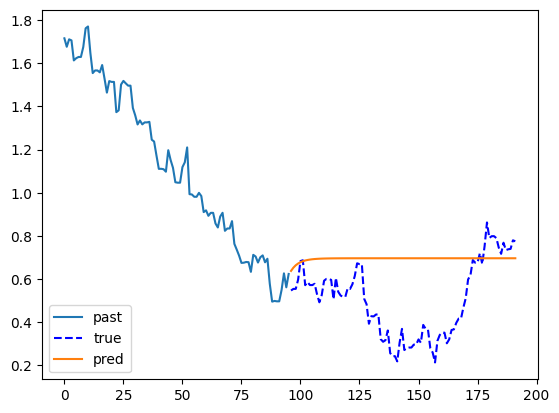

In [15]:
i=990
(batch_x, batch_y, batch_x_mark, batch_y_mark)  = ds[i]
l1 = batch_x.shape[0]
l2 = batch_y.shape[0]
plt.plot(range(l1), batch_x[:, -1], label='past')
plt.plot(range(l1, l1+l2), batch_y[:, -1], color='blue', ls='--', label='true')
plt.plot(range(l1, l1+l2), preds[i], label='pred');
plt.legend(loc='lower left')